In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (10,5)


In [4]:
df = pd.read_csv("amazon_prime_titles.csv")

In [20]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",N/A,N/A,1940,7+,60 min,Comedy
9664,s9665,TV Show,Planet Patrol,N/A,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",N/A,N/A,2018,13+,4 Seasons,TV Shows
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",N/A,N/A,2008,R,90 min,Action
9666,s9667,TV Show,Maradona: Blessed Dream,N/A,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",N/A,N/A,2021,TV-MA,1 Season,"Drama, Sports"


In [6]:
df.drop("description", axis = 1, inplace = True)

In [ ]:
# Missing values

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

<AxesSubplot:>

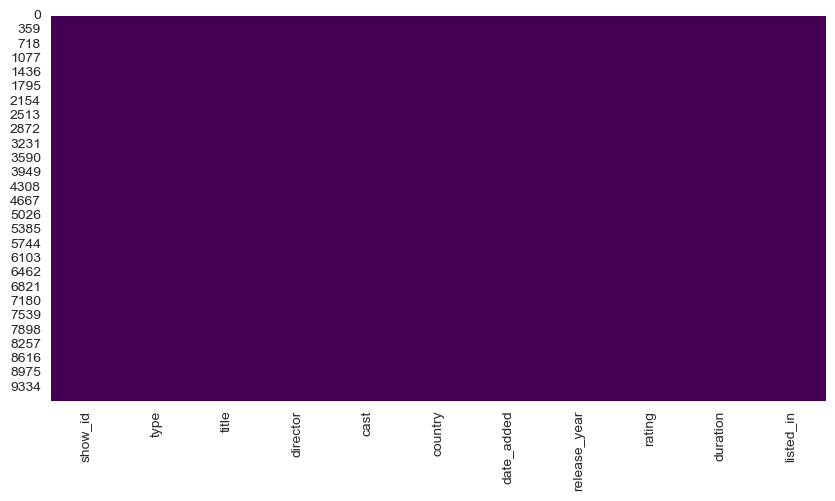

In [18]:
sns.heatmap(df.isnull(), cmap = "viridis", cbar = False)

In [13]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [17]:
for column in df.columns:
    df[column].fillna("N/A",inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


In [44]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [46]:
# Country-wise total films

df["country"].value_counts()

N/A                                      8996
United States                             253
India                                     229
United Kingdom                             28
Canada                                     16
                                         ... 
United States, Germany, Brazil, Italy       1
South Africa                                1
Australia, United States, Germany           1
Germany, Austria, United States             1
Italy, Spain                                1
Name: country, Length: 87, dtype: int64

In [47]:
country = df[df["country"]!="N/A"]

In [50]:
country_count = country["country"].value_counts().sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'Country-wise total releases')

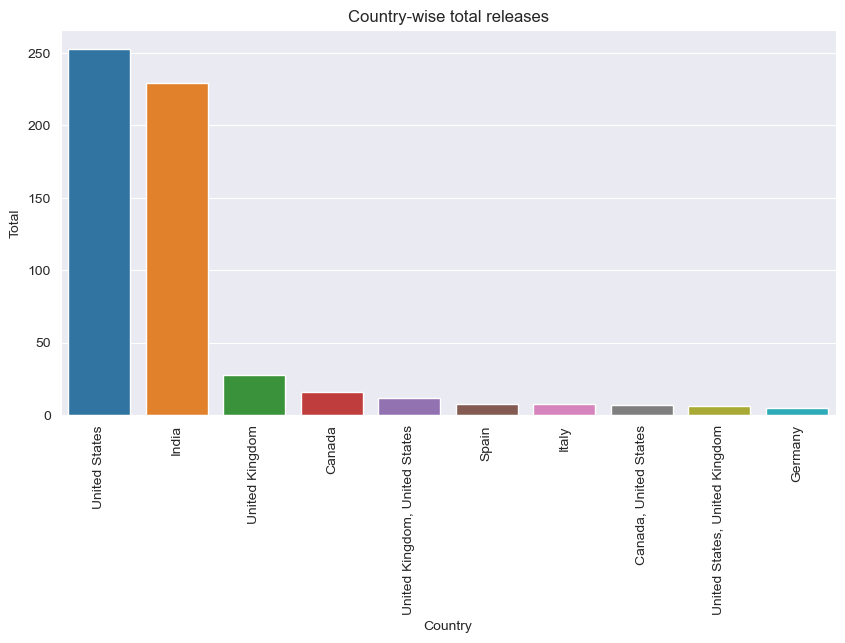

In [53]:
sns.barplot(x = country_count.index,y = country_count.values)
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Total")
plt.title("Country-wise total releases")

In [56]:
# Year-wise total releases

year = df["release_year"].value_counts().sort_values(ascending = False).head(10)

Text(0, 0.5, 'Total')

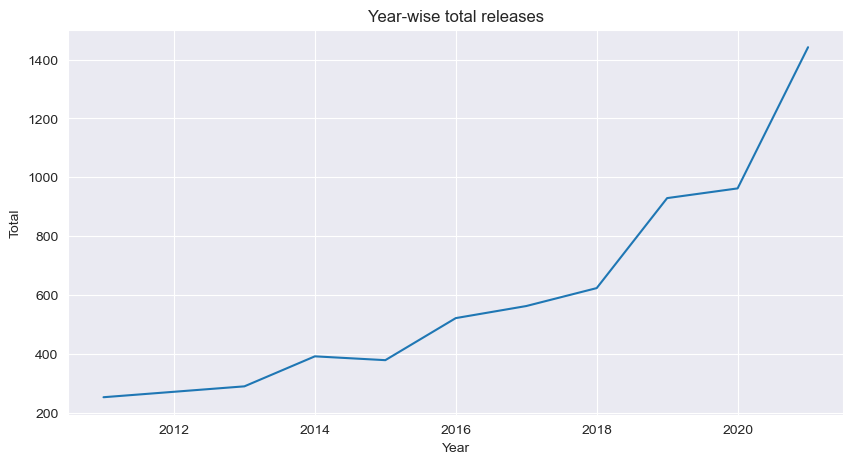

In [59]:
sns.lineplot(x = year.index, y = year.values)
plt.title("Year-wise total releases")
plt.xlabel("Year")
plt.ylabel("Total")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shows per rating')

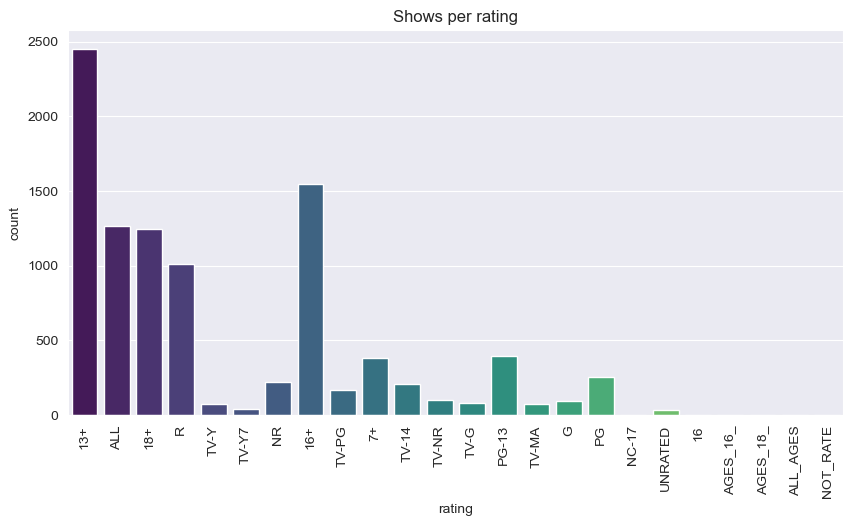

In [63]:
# Movie ratings

sns.countplot("rating", data = df, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Shows per rating")

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [66]:
# Top 10 directors

director = df[df["director"]!="N/A"]

In [71]:
director_count = director["director"].value_counts().sort_values(ascending = False).head(10)

<AxesSubplot:>

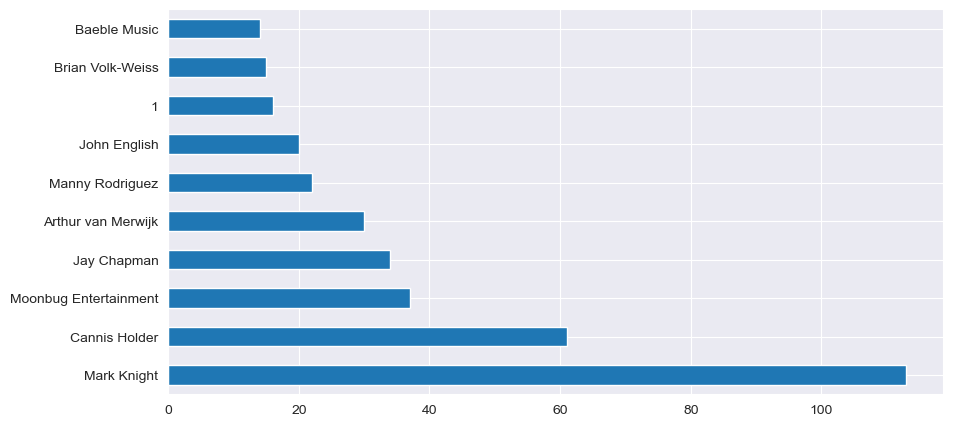

In [72]:
director_count.plot(kind = "barh")

In [73]:
df["listed"] = df["listed_in"].apply(lambda x: x.split(",")[0])

In [74]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,listed
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",Comedy
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",Drama
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",Action
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Drama


In [77]:
# Mostly listed in

listed = df["listed"].value_counts().head(15)

Text(0.5, 1.0, 'Listed In')

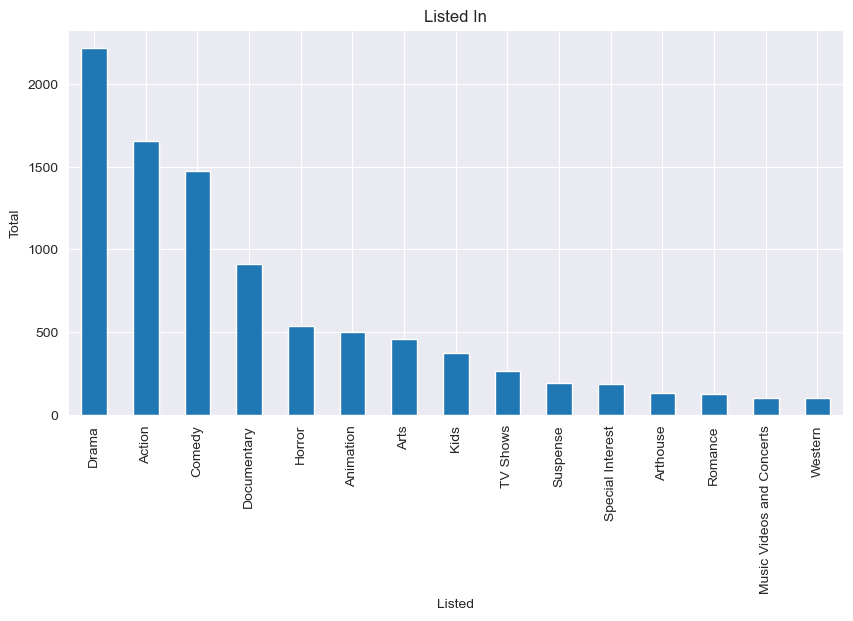

In [79]:
listed.plot(kind = "bar")
plt.xlabel("Listed")
plt.ylabel("Total")
plt.title("Listed In")

In [80]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,listed
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",Comedy
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",Drama
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",Action
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,Documentary
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",N/A,N/A,1940,7+,60 min,Comedy,Comedy
9664,s9665,TV Show,Planet Patrol,N/A,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",N/A,N/A,2018,13+,4 Seasons,TV Shows,TV Shows
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",N/A,N/A,2008,R,90 min,Action,Action
9666,s9667,TV Show,Maradona: Blessed Dream,N/A,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",N/A,N/A,2021,TV-MA,1 Season,"Drama, Sports",Drama
